<a href="https://colab.research.google.com/github/taengbae/DNA/blob/main/%ED%8E%AD%EA%B7%84%EB%AA%B8%EB%AC%B4%EA%B2%8C%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DACON 펭귄몸무게 예측 경진대회

---




#0. 패키지 및 데이터 불러오기



## 0.1 패키지 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plotly

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  cuda-command-line-tools-10-0 cuda-command-line-tools-10-1
  cuda-command-line-tools-11-0 cuda-compiler-10-0 cuda-compiler-10-1
  cuda-compiler-11-0 cuda-cuobjdump-10-0 cuda-cuobjdump-10-1
  cuda-cuobjdump-11-0 cuda-cupti-10-0 cuda-cupti-10-1 cuda-cupti-11-0
  cuda-cupti-dev-11-0 cuda-documentation-10-0 cuda-documentation-10-1
  cuda-documentation-11-0 cuda-documentation-11-1 cuda-gdb-10-0 cuda-gdb-10-1
  cuda-gdb-11-0 cuda-gpu-library-advisor-10-0 cuda-gpu-library-advisor-10-1
  cuda-libraries-10-0 cuda-libraries-10-1 cuda-libraries-11-0
  cuda-memcheck-10-0 cuda-memcheck-10-1 cuda-memcheck-11-0 cuda-nsight-10-0
  cuda-nsight-10-1 cuda-nsight-11-0 cuda-nsight-11-1 cuda-nsight-compute-10-0
  cuda-nsight-compute-10-1 cuda-nsight-compute-11-0 cuda-nsight-compute-11-1
  cuda-nsight-systems-10-1 cuda-nsight-systems-

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import matplotlib.font_manager as fm
plt.rc('font', family='NanumBarunGothic')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

##0.2 데이터 불러오기

In [ ]:
test = '/content/drive/MyDrive/Colab Notebooks/data/펭귄/test.csv'
train = '/content/drive/MyDrive/Colab Notebooks/data/펭귄/train.csv'
submission = '/content/drive/MyDrive/Colab Notebooks/data/펭귄/sample_submission.csv'

In [ ]:
train = pd.read_csv(train)
test = pd.read_csv(test)
subm = pd.read_csv(submission)

#1. 데이터 전처리
1. id : 샘플 아이디
2.Species: 펭귄의 종을 나타내는 문자열
3. Island : 샘플들이 수집된 Palmer Station 근처 섬 이름
4. Clutch Completion : 관찰된 펭귄 둥지의 알이 2개인 경우 Full Clutch이며 Yes로 표기
5. Culmen Length (mm) : 펭귄 옆모습 기준 부리의 가로 길이
6. Culmen Depth (mm) : 펭귄 옆모습 기준 부리의 세로 길이
7. Flipper Length (mm) : 펭귄의 팔(날개) 길이
8. Sex : 펭귄의 성별
9. Delta 15 N (o/oo)  : 토양에 따라 변화하는 안정 동위원소 15N:14N의 비율
10. Delta 13 C (o/oo) : 먹이에 따라 변화하는 안정 동위원소 13C:12C의 비율
11. Body Mass (g): 펭귄의 몸무게를 나타내는 숫자 (g)

##1.1 데이터 확인

In [ ]:
train.head()

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   114 non-null    int64  
 1   Species              114 non-null    object 
 2   Island               114 non-null    object 
 3   Clutch Completion    114 non-null    object 
 4   Culmen Length (mm)   114 non-null    float64
 5   Culmen Depth (mm)    114 non-null    float64
 6   Flipper Length (mm)  114 non-null    int64  
 7   Sex                  111 non-null    object 
 8   Delta 15 N (o/oo)    111 non-null    float64
 9   Delta 13 C (o/oo)    111 non-null    float64
 10  Body Mass (g)        114 non-null    int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 9.9+ KB


In [ ]:
train.describe()

,id,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
count,114.000000,114.000000,114.000000,114.000000,111.000000,111.000000,114.000000
mean,56.500000,44.613158,17.014912,203.052632,8.737634,-25.723051,4327.850877
std,33.052988,5.321829,1.941363,14.653425,0.567698,0.859786,781.766484
min,0.000000,33.500000,13.200000,174.000000,7.632200,-27.018540,2700.000000
25%,28.250000,40.325000,15.225000,190.000000,8.272585,-26.434025,3675.000000
50%,56.500000,45.200000,17.250000,199.000000,8.632590,-25.955410,4250.000000
75%,84.750000,49.075000,18.600000,216.000000,9.264635,-25.005945,4850.000000
max,113.000000,55.100000,21.100000,231.000000,10.025440,-24.102550,6300.000000


In [ ]:
train

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,Chinstrap penguin (Pygoscelis antarctica),Dream,No,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,Gentoo penguin (Pygoscelis papua),Biscoe,No,49.6,16.0,225,MALE,8.38324,-26.84272,5700
...,...,...,...,...,...,...,...,...,...,...,...
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700
110,110,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,39.2,18.6,190,MALE,9.11006,-25.79549,4250
111,111,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,43.2,18.5,192,MALE,8.97025,-26.03679,4100
112,112,Chinstrap penguin (Pygoscelis antarctica),Dream,No,46.9,16.6,192,FEMALE,9.80589,-24.73735,2700


In [ ]:
test

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,Adelie Penguin (Pygoscelis adeliae),Biscoe,No,37.9,18.6,172.0,FEMALE,8.38404,-25.19837
...,...,...,...,...,...,...,...,...,...,...
223,223,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,49.3,19.9,203.0,MALE,9.88809,-24.59513
224,224,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,14.8,217.0,FEMALE,8.58487,-26.59290
225,225,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.5,13.5,210.0,FEMALE,7.99530,-25.32829
226,226,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,50.5,19.6,201.0,MALE,9.80590,-24.72940


##1.2.(1) train 결측값 확인 및 처리

In [ ]:
train.isnull().sum() #결측값 존재

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    3
Delta 15 N (o/oo)      3
Delta 13 C (o/oo)      3
Body Mass (g)          0
dtype: int64

In [ ]:
# 결측치보유 행 확인
train[train.isna().sum(axis=1) > 0]

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
6,6,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,42.0,20.2,190,NaN,9.13362,-25.09368,4250
8,8,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,34.1,18.1,193,NaN,NaN,NaN,3475
18,18,Adelie Penguin (Pygoscelis adeliae),Dream,No,39.8,19.1,184,MALE,NaN,NaN,4650
70,70,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,46.2,14.4,214,NaN,8.24253,-26.81540,4650
109,109,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,36.6,17.8,185,FEMALE,NaN,NaN,3700


In [ ]:
#Delta 15 N (o/oo) 결측값 -> 평균으로 처리
mean_15 = train['Delta 15 N (o/oo)'].mean()
train['Delta 15 N (o/oo)'].fillna(mean_15, inplace = True)

In [ ]:
#Delta 13 N (o/oo) 결측값 -> 평균으로 처리
mean_13 = train['Delta 13 C (o/oo)'].mean()
train['Delta 13 C (o/oo)'].fillna(mean_13, inplace = True)

In [ ]:
#Sex 결측값 -> 삭제(1차) -> 성별에 따른 몸무게 차이 유무로 남녀 몸무게 평균값을 보고 예측하여 결측값 대체(2차)
#train = train.dropna(subset=['Sex'])
train.loc[6,'Sex']='MALE'
train.loc[8,'Sex']='FEMALE'
train.loc[70,'Sex']='MALE'

In [ ]:
train.isnull().sum() #결측값 처리 확인

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
Body Mass (g)          0
dtype: int64

##1.2.(2) test 결측값 확인 및 처리

In [ ]:
test.isnull().sum() #결측값 존재

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    6
Delta 15 N (o/oo)      9
Delta 13 C (o/oo)      8
dtype: int64

In [ ]:
# 결측치보유 행 확인
test[test.isna().sum(axis=1) > 0]

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
27,27,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,38.6,21.2,191.0,MALE,NaN,NaN
46,46,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,37.8,17.1,186.0,NaN,8.63243,-25.21315
75,75,Chinstrap penguin (Pygoscelis antarctica),Dream,Yes,51.9,19.5,206.0,MALE,NaN,-23.78767
81,81,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,37.5,18.9,179.0,NaN,NaN,NaN
98,98,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,13.8,216.0,NaN,8.25818,-26.23886
106,106,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,47.3,15.3,222.0,MALE,NaN,NaN
152,152,Gentoo penguin (Pygoscelis papua),Biscoe,Yes,44.5,15.7,217.0,NaN,8.04111,-26.18444
159,159,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,41.1,17.6,182.0,FEMALE,NaN,NaN
175,175,Adelie Penguin (Pygoscelis adeliae),Dream,Yes,40.8,18.4,195.0,MALE,NaN,NaN
202,202,Adelie Penguin (Pygoscelis adeliae),Torgersen,Yes,39.1,18.7,181.0,MALE,NaN,NaN


In [ ]:
#Delta 15 N (o/oo) 결측값 -> 평균으로 처리
mean_15 = test['Delta 15 N (o/oo)'].mean()
test['Delta 15 N (o/oo)'].fillna(mean_15, inplace = True)

In [ ]:
#Delta 13 N (o/oo) 결측값 -> 평균으로 처리
mean_13 = test['Delta 13 C (o/oo)'].mean()
test['Delta 13 C (o/oo)'].fillna(mean_13, inplace = True)

In [ ]:
#Sex 결측값 -> 삭제
test = test.dropna(subset=['Sex'])

In [ ]:
test.isnull().sum() #결측값 처리 확인

id                     0
Species                0
Island                 0
Clutch Completion      0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

#2. 시각화

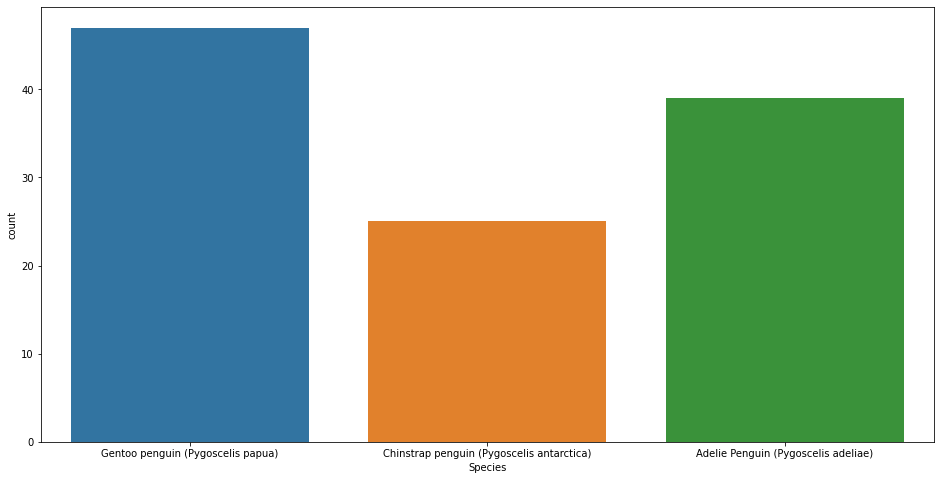

In [ ]:
#펭귄종
fig = plt.figure(figsize=(16,8))
sns.countplot(x=train['Species'])

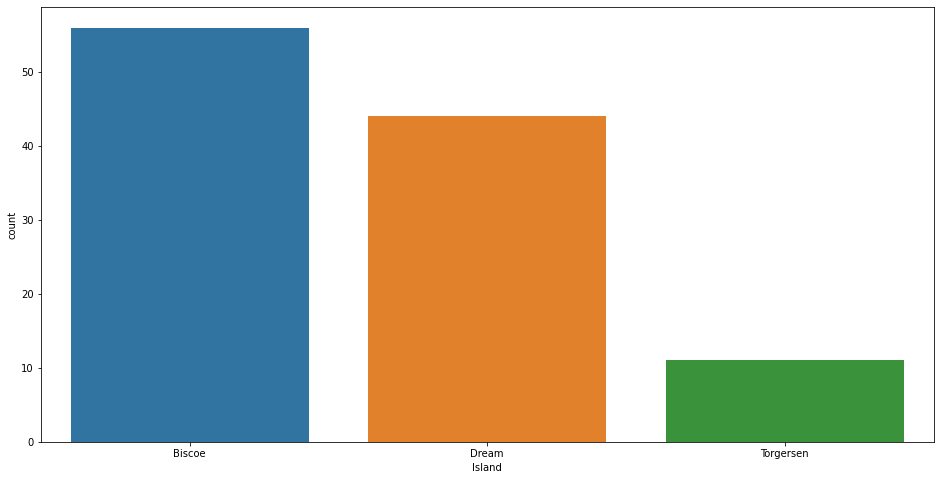

In [ ]:
#섬
fig = plt.figure(figsize=(16,8))
sns.countplot(x=train['Island'])

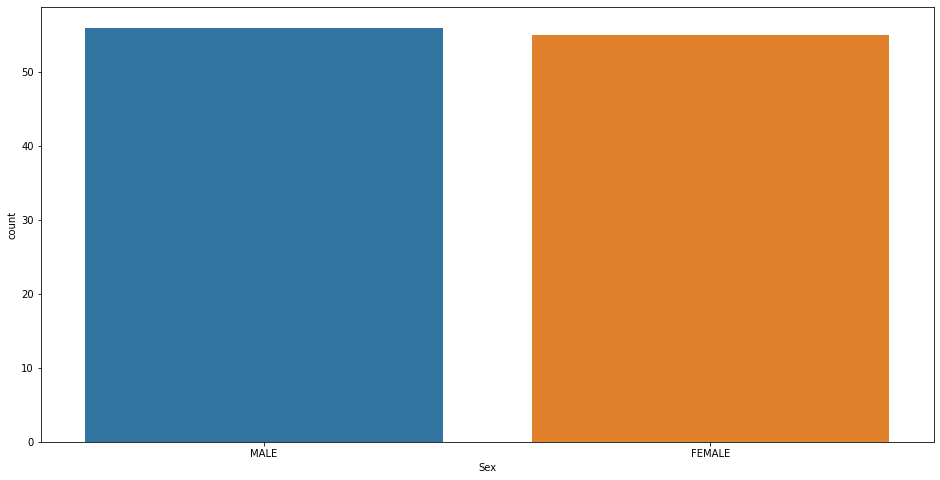

In [ ]:
#펭귄성별
fig = plt.figure(figsize=(16,8))
sns.countplot(x=train['Sex'])

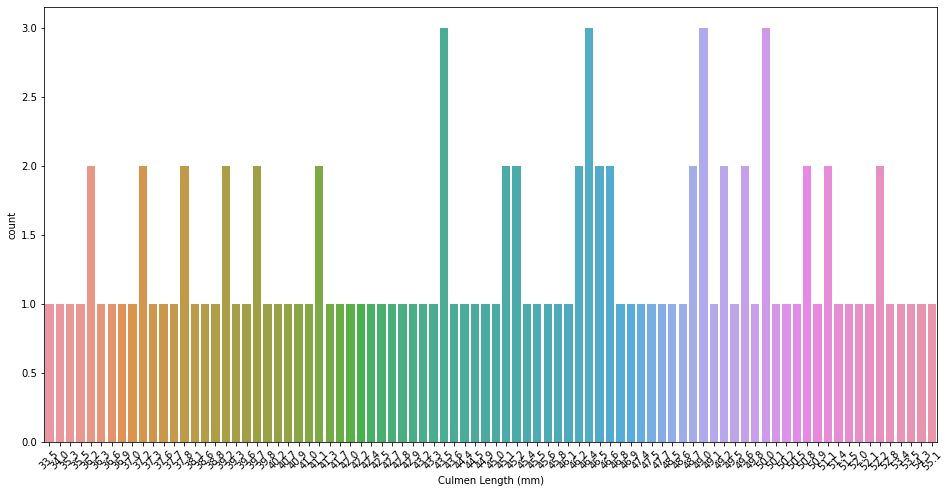

In [ ]:
#펭귄 옆모습 기준 부리의 가로 길이
fig = plt.figure(figsize=(16,8))
plt.xticks(rotation =  45 ) #글씨 회전
sns.countplot(x=train['Culmen Length (mm)'])

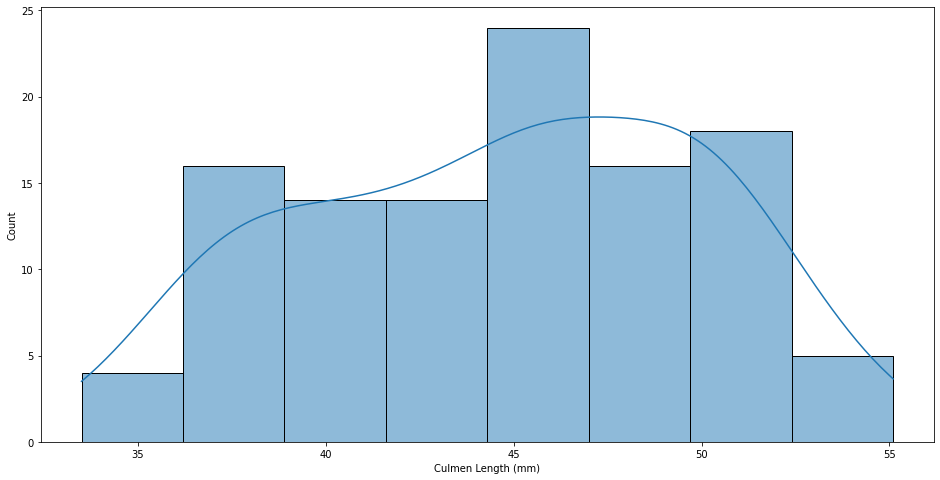

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.histplot(x=train['Culmen Length (mm)'], kde=True)

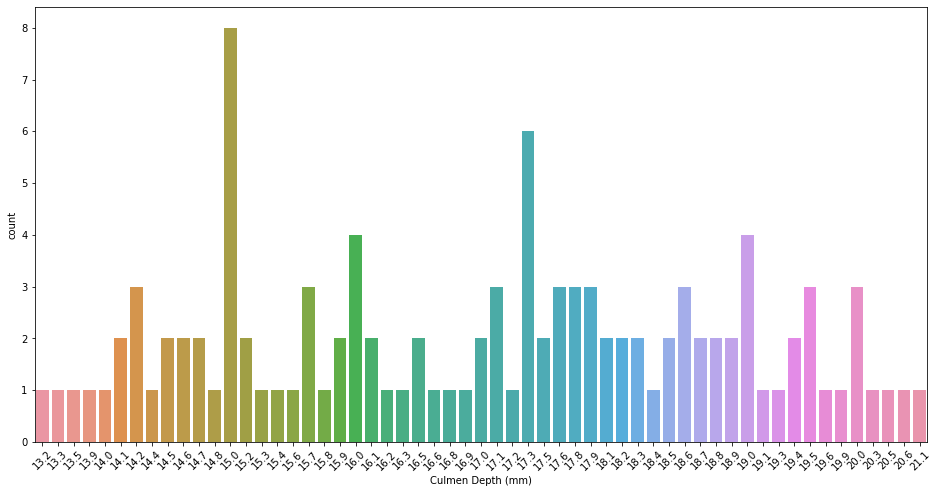

In [ ]:
#펭귄 옆모습 기준 부리의 세로 길이
fig = plt.figure(figsize=(16,8))
plt.xticks(rotation =  45 ) #글씨 회전
sns.countplot(x=train['Culmen Depth (mm)'])

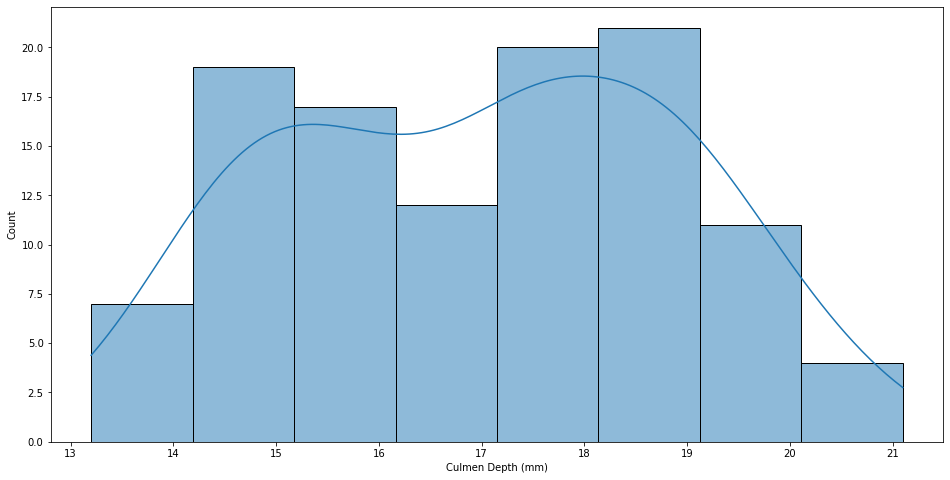

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.histplot(x=train['Culmen Depth (mm)'], kde=True)

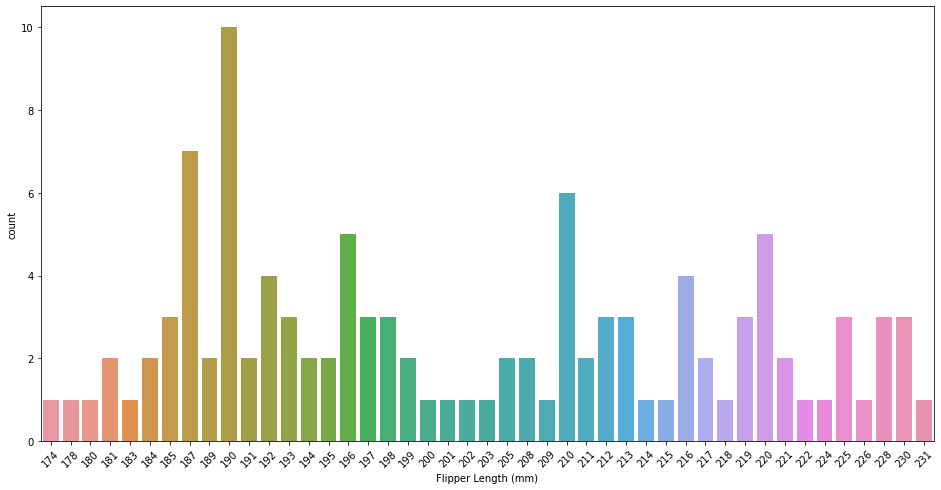

In [ ]:
#펭귄의 팔(날개) 길이
fig = plt.figure(figsize=(16,8))
plt.xticks(rotation =  45 ) #글씨 회전
sns.countplot(x=train['Flipper Length (mm)'])

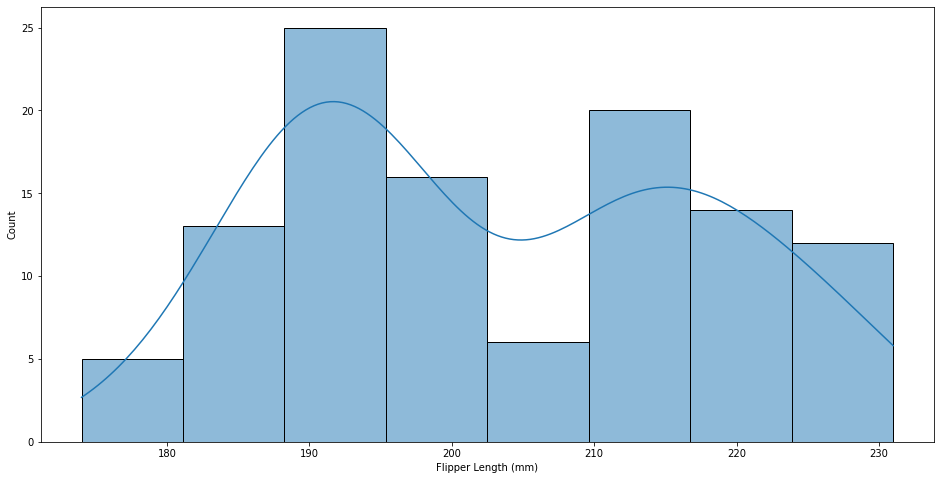

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.histplot(x=train['Flipper Length (mm)'], kde=True)

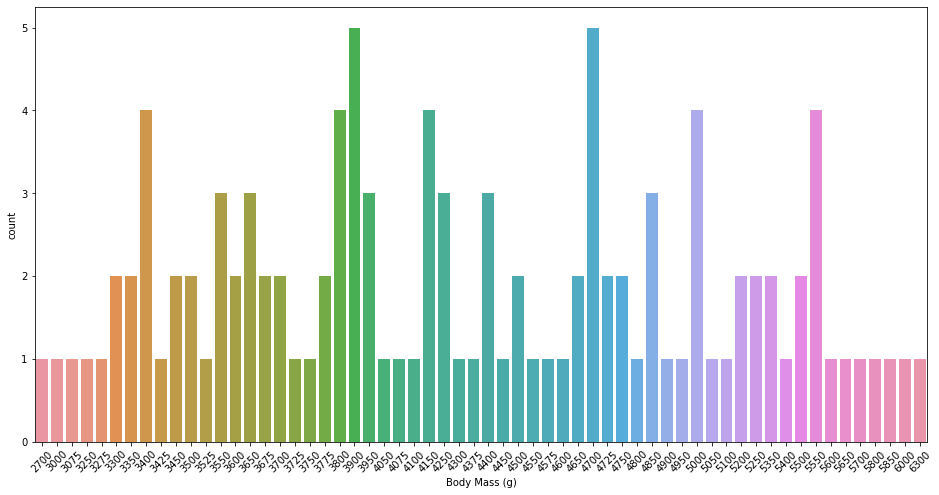

In [ ]:
#펭귄의 몸무게를 나타내는 숫자 (g)
fig = plt.figure(figsize=(16,8))
plt.xticks(rotation =  45 ) #글씨 회전
sns.countplot(x=train['Body Mass (g)'])

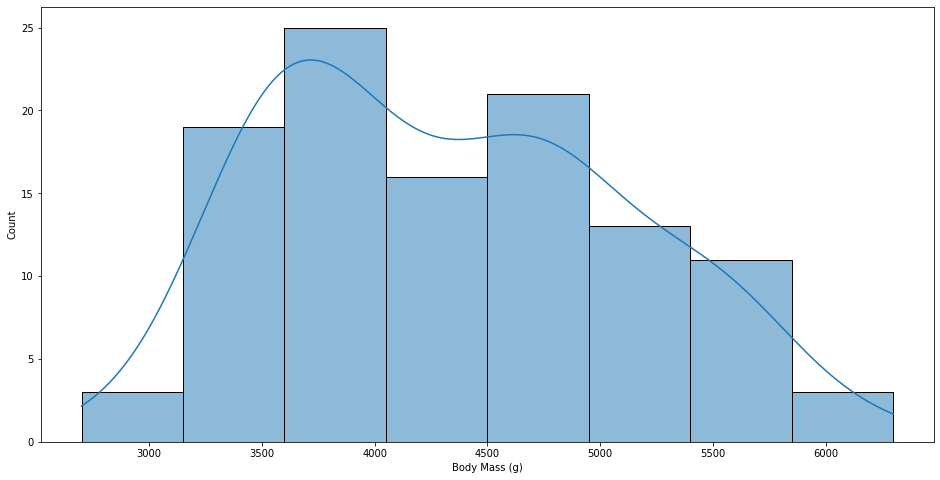

In [ ]:
fig = plt.figure(figsize=(16,8))
sns.histplot(x=train['Body Mass (g)'], kde=True)

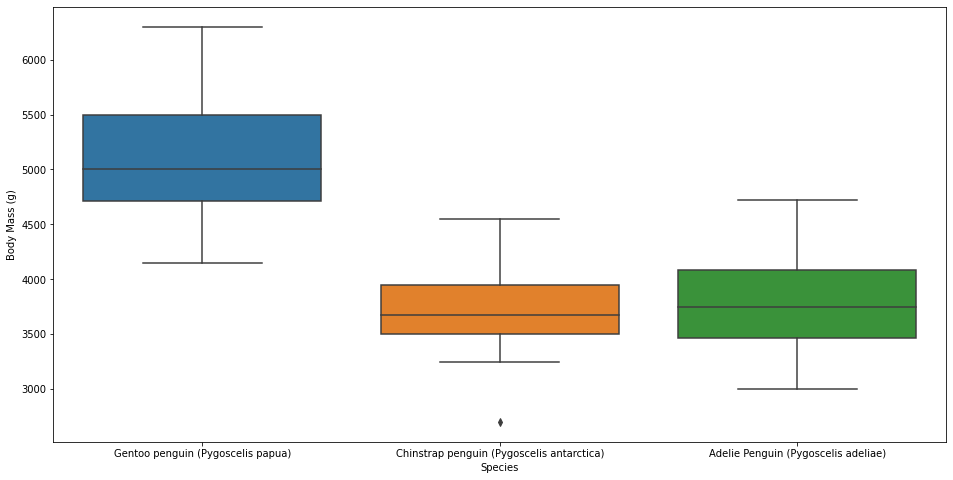

In [ ]:
#펭귄 종/몸무게 - Gentoo펭귄이 몸무게와 큰 상관관계가 있는 것으로 보임
fig = plt.figure(figsize=(16,8))
sns.boxplot(x=train['Species'], y=train['Body Mass (g)'])
plt.show()

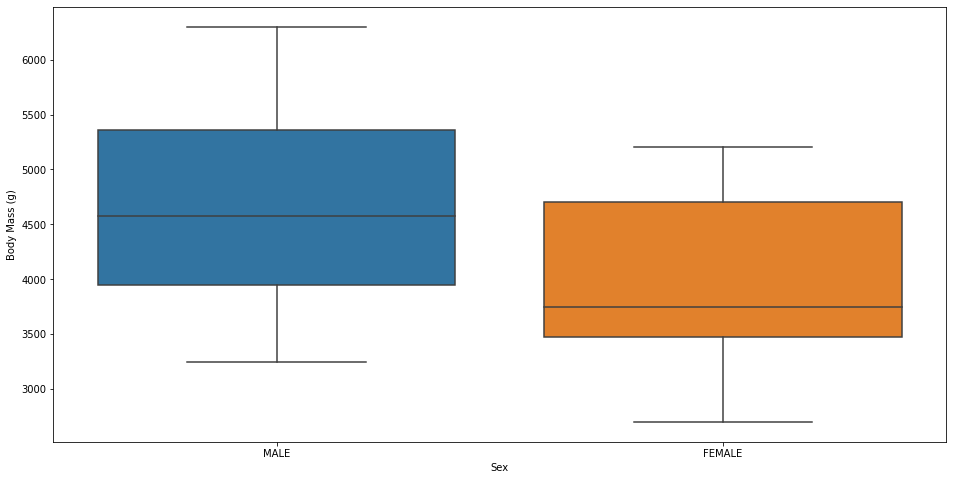

In [ ]:
#펭귄 성별과 몸무게 박스그림 - 남/여 몸무게 차이 있음
fig = plt.figure(figsize=(16,8))
sns.boxplot(x=train['Sex'], y=train['Body Mass (g)'])
plt.show()

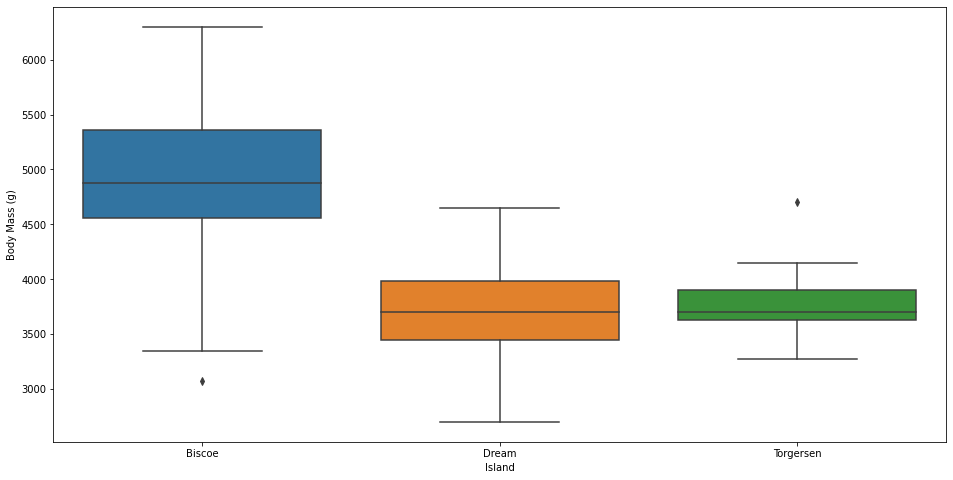

In [ ]:
#펭귄 성별과 몸무게 박스그림 - Biscoe 지역의 펭귄들 몸무게가 Dream, Torgersen 지역의 펭귄들의 몸무게보다 큼
fig = plt.figure(figsize=(16,8))
sns.boxplot(x=train['Island'], y=train['Body Mass (g)'])
plt.show()

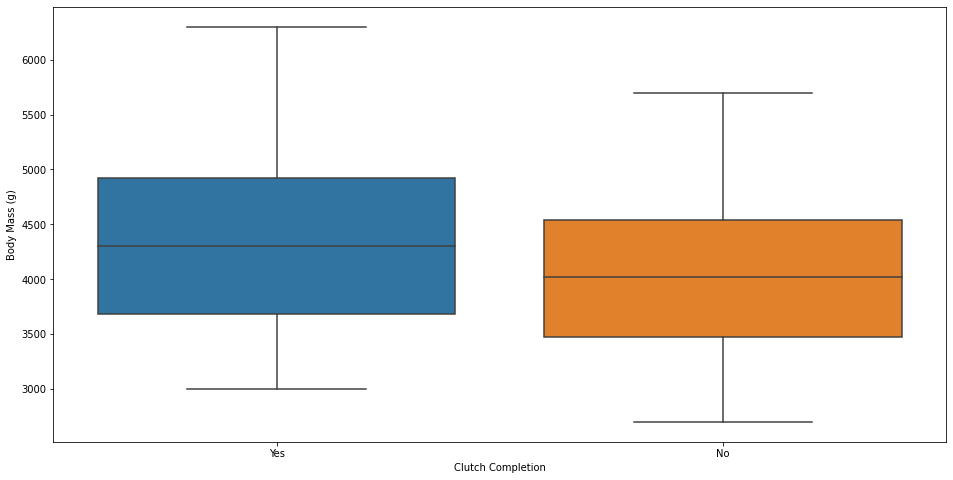

In [ ]:
#펭귄 성별과 몸무게 박스그림 - 차이가 안보임
fig = plt.figure(figsize=(16,8))
sns.boxplot(x=train['Clutch Completion'], y=train['Body Mass (g)'])
plt.show()

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


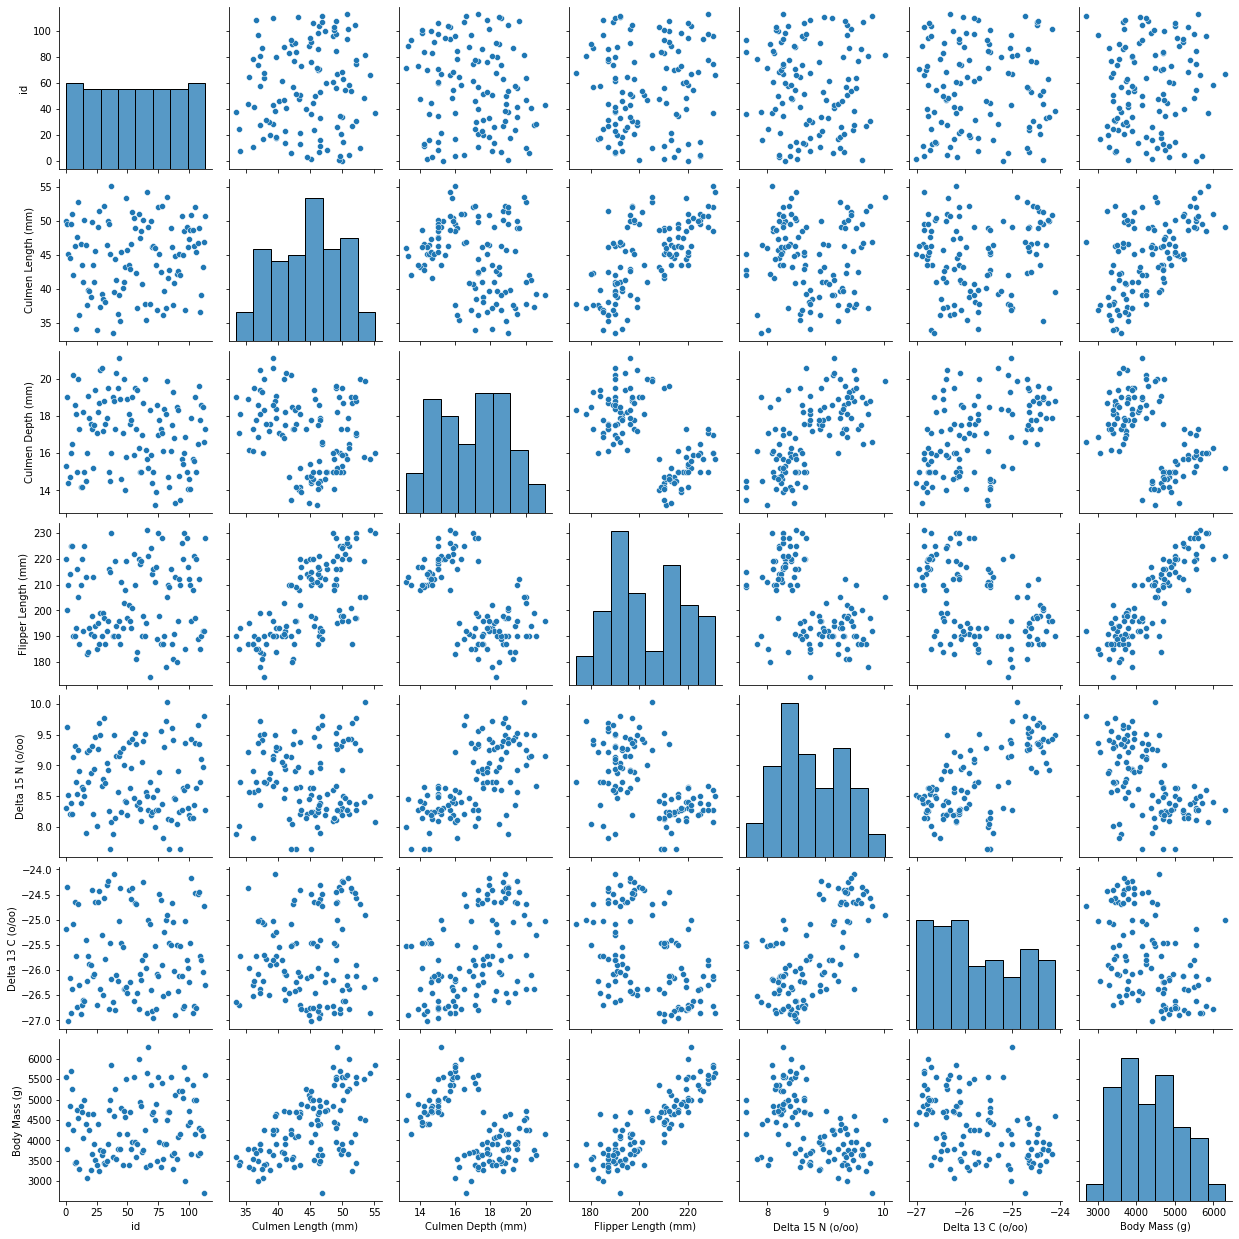

In [ ]:
#산점도
sns.pairplot(train, diag_kind='hist')
plt.show()

#3. 상관관계

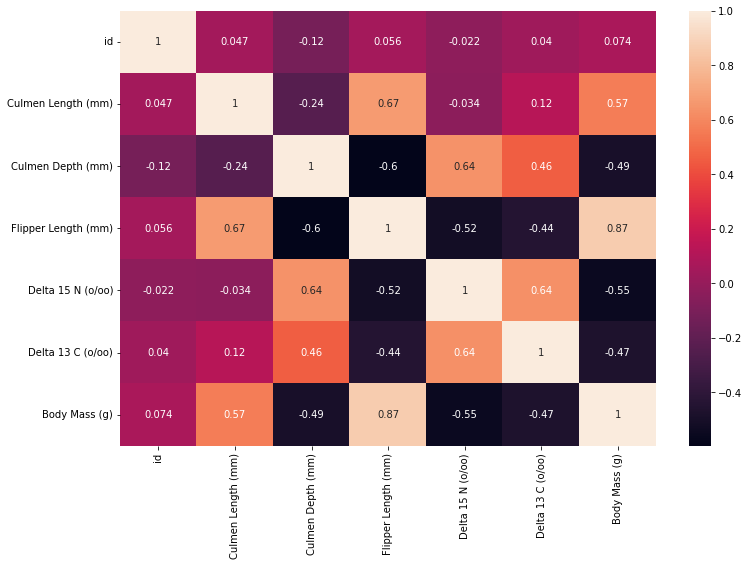

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True)

#4. 모델링을 위한 범주형 변수 인코딩

In [ ]:
# 데이터를 수치형으로 바꾸기 - 라벨인코더 사용
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

train["Species"] = le.fit_transform(train["Species"])
train["Clutch Completion"] = le.fit_transform(train["Clutch Completion"])
train["Island"] = le.fit_transform(train["Island"])

train.head(5)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g)
0,0,2,0,1,50.0,15.3,220,MALE,8.30515,-25.19017,5550
1,1,1,1,0,49.5,19.0,200,MALE,9.63074,-24.34684,3800
2,2,2,0,1,45.1,14.4,210,FEMALE,8.51951,-27.01854,4400
3,3,2,0,1,44.5,14.7,214,FEMALE,8.20106,-26.16524,4850
4,4,2,0,0,49.6,16.0,225,MALE,8.38324,-26.84272,5700


In [ ]:
# 데이터를 수치형으로 바꾸기 - 성별 더미로 바꾸기
train = pd.get_dummies(train, columns = ['Sex'])

train.head(5)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Body Mass (g),Sex_FEMALE,Sex_MALE
0,0,2,0,1,50.0,15.3,220,8.30515,-25.19017,5550,0,1
1,1,1,1,0,49.5,19.0,200,9.63074,-24.34684,3800,0,1
2,2,2,0,1,45.1,14.4,210,8.51951,-27.01854,4400,1,0
3,3,2,0,1,44.5,14.7,214,8.20106,-26.16524,4850,1,0
4,4,2,0,0,49.6,16.0,225,8.38324,-26.84272,5700,0,1


In [ ]:
# test
# 데이터를 수치형으로 바꾸기 - 라벨인코더 사용
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

test["Species"] = le.fit_transform(test["Species"])
test["Clutch Completion"] = le.fit_transform(test["Clutch Completion"])
test["Island"] = le.fit_transform(test["Island"])

test.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo)
0,0,1,1,1,52.0,20.7,210.0,MALE,9.43146,-24.68440
1,1,2,0,1,55.9,17.0,228.0,MALE,8.31180,-26.35425
2,2,0,1,1,38.9,18.8,190.0,FEMALE,8.36936,-26.11199
3,3,1,1,1,45.2,16.6,191.0,FEMALE,9.62357,-24.78984
4,4,0,0,0,37.9,18.6,172.0,FEMALE,8.38404,-25.19837


In [ ]:
# 데이터를 수치형으로 바꾸기 - 성별 더미로 바꾸기
test = pd.get_dummies(test, columns = ['Sex'])

test.head(5)

,id,Species,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex_FEMALE,Sex_MALE
0,0,1,1,1,52.0,20.7,210.0,9.43146,-24.68440,0,1
1,1,2,0,1,55.9,17.0,228.0,8.31180,-26.35425,0,1
2,2,0,1,1,38.9,18.8,190.0,8.36936,-26.11199,1,0
3,3,1,1,1,45.2,16.6,191.0,9.62357,-24.78984,1,0
4,4,0,0,0,37.9,18.6,172.0,8.38404,-25.19837,1,0


#5. 모델링

##5.1 train/test 나누기

In [ ]:
y = train['Body Mass (g)']
x = train.drop('Body Mass (g)', axis = 1)

In [ ]:
#용량 줄이기
x = np.nan_to_num(x)

In [ ]:
# train_test_split로 데이터를 나누기
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(91, 11)
(91,)
(23, 11)
(23,)


##5.2 LightGBM

In [ ]:
model_lgbm = LGBMRegressor()
model_lgbm.fit(x_train,y_train)

LGBMRegressor()

In [ ]:
train_pred = model_lgbm.predict(x_train)
test_pred = model_lgbm.predict(x_test)

In [ ]:
rmse1 = mean_squared_error(y_train, train_pred)**0.5
rmse2 = mean_squared_error(y_test, test_pred)**0.5

print('train score :', rmse1, 'test score :', rmse2)

train score : 230.30607496532258 test score : 416.7419443539102


###5.2.(1) 스케일링 추가

In [ ]:
# 데이터 정규화

scaler = StandardScaler()
scaler.fit(x_train)
x_scaled_train = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [ ]:
model_lgbm2 = LGBMRegressor()
model_lgbm2.fit(x_scaled_train,y_train)

LGBMRegressor()

In [ ]:
train_pred = model_lgbm2.predict(x_scaled_train)
test_pred = model_lgbm2.predict(x_scaled_test)

In [ ]:
rmse1 = mean_squared_error(y_train, train_pred)**0.5
rmse2 = mean_squared_error(y_test, test_pred)**0.5

print('train score :', rmse1, 'test score :', rmse2)

train score : 229.48413719327948 test score : 403.2625778909774


스케일링 후 성능 상승 기대, 하지만 생각외로 성능 하락

##5.3 로지스틱 회귀

In [ ]:
# 데이터 정규화

scaler = StandardScaler()
scaler.fit(x_train)
x_scaled_train = scaler.transform(x_train)
x_scaled_test = scaler.transform(x_test)

In [ ]:
# (C=99) 하이퍼 파라미터 미적용

model_ = LogisticRegression()
model_.fit(x_scaled_train,y_train)

train_pred1 = model_.predict(x_scaled_train)
test_pred1 = model_.predict(x_scaled_test)

In [ ]:
# (C=99) 하이퍼 파라미터 적용

model_C = LogisticRegression(C=99)
model_C.fit(x_scaled_train,y_train)

train_pred = model_C.predict(x_scaled_train)
test_pred = model_C.predict(x_scaled_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#RMSE 구하기

rmse1 = mean_squared_error(y_train, train_pred1)**0.5
rmse2 = mean_squared_error(y_test, test_pred1)**0.5

rmse3 = mean_squared_error(y_train, train_pred)**0.5
rmse4 = mean_squared_error(y_test, test_pred)**0.5

print('C=99 미적용 train score :', rmse1, 'test score :', rmse2)
print('C=99 적용 train score :', rmse3, 'test score :', rmse4)

C=99 미적용 train score : 267.0941514041176 test score : 461.6546328154847
C=99 적용 train score : 57.65566601970551 test score : 488.7317215530151


(C=99) 하이퍼 파라미터 적용 후 성능 상승
-> 적용 후 train 성능이 왜 낮은지는 모르겠음

##5.4 랜덤포레스트

In [ ]:
# RF model 생성
model_RF = RandomForestRegressor()
model_RF.fit(x_train, y_train)

RandomForestRegressor()

In [ ]:
train_pred = model_RF.predict(x_train)
test_pred = model_RF.predict(x_test)

In [ ]:
rmse1 = mean_squared_error(y_train, train_pred)**0.5
rmse2 = mean_squared_error(y_test, test_pred)**0.5

print('train score :', rmse1, 'test score :', rmse2)

train score : 131.11333282300487 test score : 384.4078379398178


높지 않은 성능

##5.5 Ridge/Lasso

In [ ]:
#릿지
model_Ridge = Ridge()
model_Ridge.fit(x_train, y_train)

train_pred1 = model_Ridge.predict(x_train)
test_pred1 = model_Ridge.predict(x_test)

#랏소
model_lasso = Lasso()
model_lasso.fit(x_train, y_train)

train_pred2 = model_lasso.predict(x_train)
test_pred2 = model_lasso.predict(x_test)

In [ ]:
rmse1 = mean_squared_error(y_train, train_pred1)**0.5
rmse2 = mean_squared_error(y_test, test_pred1)**0.5

rmse3 = mean_squared_error(y_train, train_pred2)**0.5
rmse4 = mean_squared_error(y_test, test_pred2)**0.5

print('[Ridge] train score :', rmse1, 'test score :', rmse2)
print('[Lasso] train score :', rmse3, 'test score :', rmse4)

[Ridge] train score : 300.309318654292 test score : 364.39739495098416
[Lasso] train score : 300.1025629937589 test score : 360.5819800782429


릿지모델이 랏소모델보다 성능이 약간 더 좋은 것을 볼 수 있음

<결론>


*   C=99 파라미터를 적용한 로지스틱 회귀 모델 성능이 가장 높음
*   추후, 라벨인코딩말고 다른 인코딩도 진행하여 차이점 확인예정
*   스케일링 후, 성능이 왜 낮아졌는지 확인하기
  -> 다른 인코딩을 사용하여 차이점 보기